In [61]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [84]:
def add_more_info(df):
    df['nodes'] = (df['g1_nodes'] + df['g2_nodes']) / 2
    df['edges'] = (df['g1_edges'] + df['g2_edges']) / 2
    df['nodes^2'] = df['g1_nodes'] * df['g2_nodes']
    df['edges^2'] = df['g1_edges'] * df['g2_edges']
    df['nodes_X_edges'] = (df['g1_nodes'] * df['g1_edges'] + df['g2_nodes'] * df['g2_edges']) / 2
    df['log_nodes_X_edges'] = np.log(df['nodes_X_edges'])
    df['uncommon_nodes'] = df['nodes'] - df['generalization_nodes']
    df['log_uncommon_nodes'] = np.log(df['uncommon_nodes'])
    df['log_avg_time'] = np.log(df['avg_time'])
    df['log_nodes'] = np.log(df['nodes'])
    df['log_nodes^2'] = np.log(df['nodes^2'])
    df['uncommon_edges'] = df['edges'] - df['generalization_edges']
    df['log_uncommon_edges'] = np.log(df['uncommon_edges'])
    df['uncommon_nodes_X_uncommon_edges'] = df['uncommon_nodes'] * df['uncommon_edges']
    df['log_uncommon_nodes_X_uncommon_edges'] = np.log(df['uncommon_nodes_X_uncommon_edges'])
    df['common_nodes_X_common_edges'] = df['generalization_nodes'] * df['generalization_edges']
    df['log_common_nodes_X_common_edges'] = np.log(df['common_nodes_X_common_edges'])

In [85]:
def linear_regression_of(df, x_column, y_column, x_label=None, y_label=None, title=None):
    X = df[x_column].values.reshape(-1, 1)
    Y = df[y_column].values.reshape(-1, 1)
    linear_regressor = LinearRegression()
    linear_regressor.fit(X, Y)
    Y_pred = linear_regressor.predict(X)
    r_squared = r2_score(Y, Y_pred)

    plt.scatter(X, Y, s=5)
    plt.plot(X, Y_pred, color='red')
    if x_label is None:
        x_label = x_column
    plt.xlabel(x_label)
    if y_label is None:
        y_label = y_column
    plt.ylabel(y_label)
    if title is None:
        title = 'Linear Regression'
    plt.title(title)
    plt.show()

    return linear_regressor.coef_, linear_regressor.intercept_, r_squared

In [86]:
df = pd.read_csv("AggregatedData.csv")
add_more_info(df)
df.head()

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,name,generalization_nodes,generalization_edges,generalization_node_variables,generalization_edge_variables,g1_nodes,g1_edges,g2_nodes,g2_edges,time0,...,log_nodes,uncommon_edges,log_uncommon_edges,uncommon_nodes_X_uncommon_edges,log_uncommon_nodes_X_uncommon_edges,common_nodes_X_common_edges,log_common_nodes_X_common_edges,nodes_X_edges,log_nodes_X_edges,log_nodes^2
0,0,35,27,11,22,72,71,171,170,92,...,4.799914,93.5,4.537961,8087.75,8.998106,945,6.851185,17091.0,9.746307,9.418330
1,1,59,48,18,38,131,130,124,123,122,...,4.848116,78.5,4.363099,5377.25,8.589932,2832,7.948738,16141.0,9.689118,9.695479
2,1000,63,55,17,31,116,115,151,150,120,...,4.894101,77.5,4.350278,5463.75,8.605891,3465,8.150468,17995.0,9.797849,9.770870
3,1001,39,30,13,23,230,229,109,108,197,...,5.132853,138.5,4.930870,18074.25,9.802244,1170,7.064759,32221.0,10.380374,10.129427
4,1002,34,29,12,19,112,111,146,145,94,...,4.859812,99.0,4.595120,9405.00,9.148997,986,6.893656,16801.0,9.729194,9.702105


In [65]:
df.describe()

,name,generalization_nodes,generalization_edges,generalization_node_variables,generalization_edge_variables,g1_nodes,g1_edges,g2_nodes,g2_edges,time0,...,log_avg_time,log_nodes,uncommon_edges,log_uncommon_edges,uncommon_nodes_X_uncommon_edges,log_uncommon_nodes_X_uncommon_edges,common_nodes_X_common_edges,log_common_nodes_X_common_edges,nodes_X_edges,log_nodes_X_edges
count,9496.000000,9496.000000,9496.000000,9496.000000,9496.000000,9496.000000,9496.000000,9496.00000,9496.00000,9496.000000,...,9496.000000,9496.000000,9496.000000,9496.000000,9496.000000,9496.000000,9496.000000,9496.000000,9.496000e+03,9.496000e+03
mean,4993.765691,67.594882,57.381529,18.202822,35.439869,189.766323,188.766323,189.43155,188.43155,363.671546,...,5.385208,5.870417,262.434815,-inf,80119.345935,-inf,5341.501474,8.014850,1.660140e+05,1.660140e+05
std,2885.753262,39.579057,37.413526,8.792712,20.046869,83.866751,83.866751,84.48652,84.48652,630.710720,...,0.973598,0.356746,129.774470,NaN,89594.602428,NaN,11468.029156,0.945036,1.512843e+05,1.512843e+05
min,0.000000,15.000000,13.000000,0.000000,0.000000,57.000000,56.000000,57.00000,56.00000,18.000000,...,2.821379,4.941642,0.000000,-inf,0.000000,-inf,195.000000,5.273000,1.932000e+04,1.932000e+04
25%,2488.750000,45.000000,37.000000,12.000000,22.000000,131.000000,130.000000,130.00000,129.00000,101.000000,...,4.693181,5.613128,176.000000,5.170484,28428.000000,10.255130,1665.000000,7.417580,7.452800e+04,7.452800e+04
50%,4998.500000,59.000000,49.000000,16.000000,31.000000,168.000000,167.000000,167.00000,166.00000,172.000000,...,5.240953,5.820083,231.000000,5.442418,49184.000000,10.803324,2912.000000,7.976595,1.128950e+05,1.128950e+05
75%,7486.250000,79.000000,67.000000,22.000000,45.000000,226.000000,225.000000,225.00000,224.00000,349.000000,...,5.944897,6.086775,315.250000,5.753365,92690.250000,11.437018,5214.000000,8.559103,1.927200e+05,1.927200e+05
max,9999.000000,425.000000,417.000000,68.000000,171.000000,548.000000,547.000000,549.00000,548.00000,12672.000000,...,9.503853,6.967909,966.000000,6.873164,925428.000000,13.738012,177225.000000,12.085175,1.125720e+06,1.125720e+06


In [45]:
import pyperclip

# pyperclip.copy(",".join(map(lambda x: str(x), list(df2[pd.isnull(df2.avg_time)].name))))
times_names=[f'time{i}' for i in range(10)]
times_names.append('avg_time')
times_names.append('std_dev')
names = ['name']
names += times_names
x = df2[pd.isnull(df2.avg_time)][names]
all_data = ''
def fixer(row):
    print(row['name'])
    empty_cell = ''
    for time in reversed(times_names):
        if pd.isna(row[time]):
            empty_cell = time
    empty_row_index = times_names.index(empty_cell)
    data = f'{int(row["name"])} to listOf('
    for i in range(empty_row_index - 2):
        data += f'{int(row[times_names[i]])}, '
    data += '),\n'
    return data


x['data'] = x.apply(fixer, axis = 1)
x['data'].to_csv('x.csv', index=False)

10.0
1021.0
1038.0
11.0
1124.0
1141.0
1170.0
118.0
1206.0
1213.0
1225.0
1256.0
1285.0
1290.0
1303.0
1308.0
1349.0
135.0
1454.0
1472.0
1503.0
1504.0
1508.0
1515.0
1517.0
1570.0
1602.0
1659.0
1692.0
1716.0
1785.0
182.0
1827.0
1860.0
1916.0
1973.0
198.0
1987.0
200.0
2016.0
2019.0
2039.0
2121.0
2135.0
2137.0
2182.0
2195.0
2245.0
2250.0
2293.0
2294.0
2299.0
2318.0
2357.0
2366.0
2373.0
2375.0
2417.0
2468.0
2490.0
2521.0
2522.0
2537.0
2562.0
2594.0
2600.0
2611.0
2613.0
2626.0
2628.0
2629.0
2630.0
2636.0
2654.0
2669.0
2697.0
2736.0
2752.0
2835.0
285.0
2877.0
291.0
293.0
2944.0
2975.0
3.0
3068.0
3128.0
3152.0
3188.0
323.0
3238.0
3242.0
3272.0
3319.0
333.0
3331.0
3338.0
3344.0
338.0
342.0
359.0
3602.0
3616.0
3679.0
3693.0
3752.0
3821.0
3833.0
3882.0
3900.0
394.0
3945.0
3946.0
3948.0
3993.0
4013.0
4023.0
4060.0
4090.0
4094.0
417.0
4194.0
4221.0
4244.0
4245.0
4262.0
4274.0
4275.0
4282.0
429.0
4302.0
4322.0
4330.0
4380.0
4399.0
4459.0
4510.0
4535.0
4566.0
4582.0
4583.0
4603.0
4607.0
4635.0
4679.0
4

In [21]:
fixed = pd.merge(df2[['name', 'generalization_nodes','generalization_edges','generalization_node_variables','generalization_edge_variables','g1_nodes','g1_edges','g2_nodes','g2_edges']], df22[times_names], on='name')
fixed

,name,generalization_nodes,generalization_edges,generalization_node_variables,generalization_edge_variables,g1_nodes,g1_edges,g2_nodes,g2_edges,time0,...,time2,time3,time4,time5,time6,time7,time8,time9,avg_time,std_dev
0,10,80,72,22,36,137,136,229,228,196,...,179,196,185,217,190,217,197,198,197.2,11.487384
1,1021,51,35,19,49,228,227,208,207,365,...,350,378,387,361,346,333,338,337,353.9,17.323106
2,1038,50,24,10,60,221,220,210,209,406,...,446,458,480,450,438,480,470,515,454.7,32.372983
3,11,45,39,11,21,143,142,221,220,174,...,162,168,177,168,170,412,182,177,195.4,72.441977
4,1124,75,54,17,56,166,165,150,149,202,...,196,197,216,214,211,207,200,198,209.7,16.882239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,9931,78,63,18,42,252,251,205,204,628,...,643,645,468,660,684,654,427,494,592.6,87.635837
347,9944,57,38,20,52,224,223,330,329,785,...,783,811,830,815,839,819,811,796,806.2,20.306649
348,9951,81,57,24,64,209,208,171,170,376,...,387,365,373,400,424,384,366,427,387.5,21.406775
349,9954,55,49,20,30,174,173,158,157,176,...,164,203,185,200,154,245,179,186,189.7,24.182845


In [40]:
# add_more_info(fixed)
df.to_csv('AggregatedData.csv', index=False)

In [28]:
times_names = [f'time{i}' for i in range(10)]
times_names.append('avg_time')
times_names.append('std_dev')
times_names.append('name')
df[df.avg_time.notnull()].sum()[times_names] / 60_000

time0        57.557083
time1        58.573933
time2        58.905567
time3        60.766483
time4        62.504783
time5        63.148417
time6        63.858650
time7        64.584200
time8        65.107967
time9        65.789361
avg_time     60.550171
std_dev       4.447006
name        790.346650
dtype: float64

In [101]:
quantile = df['avg_time'].quantile(0.99)
plt_df = df[df['avg_time'] < quantile]

<Axes: xlabel='nodes', ylabel='time (ms)'>

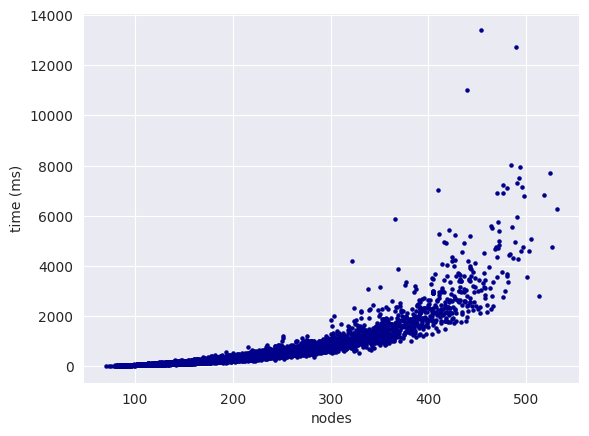

In [87]:
df.plot.scatter(x='nodes', y='avg_time', c='DarkBlue', s=5, ylabel='time (ms)', xlabel='nodes')

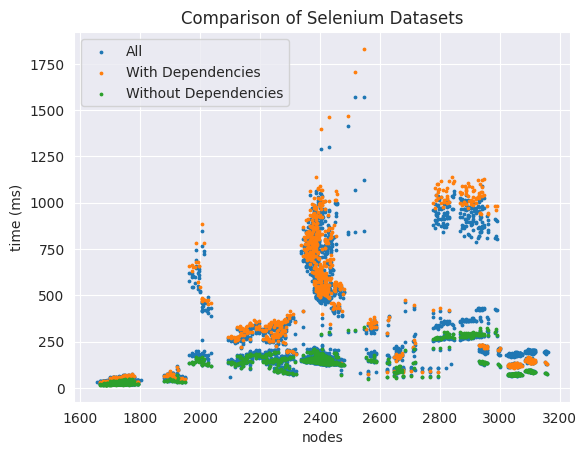

In [29]:
# Create a scatter plot for all metrics
plt.scatter(df['nodes'], df['avg_time'], label='All', s=3)
plt.scatter(df_with['nodes'], df_with['avg_time'], label='With Dependencies', s=3)
plt.scatter(df_without['nodes'], df_without['avg_time'], label='Without Dependencies', s=3)

# Customize the plot
plt.xlabel('nodes')
plt.ylabel('time (ms)')
plt.title('Comparison of Selenium Datasets')
plt.legend()

# Display the plot
plt.show()

<Axes: xlabel='edges', ylabel='time (ms)'>

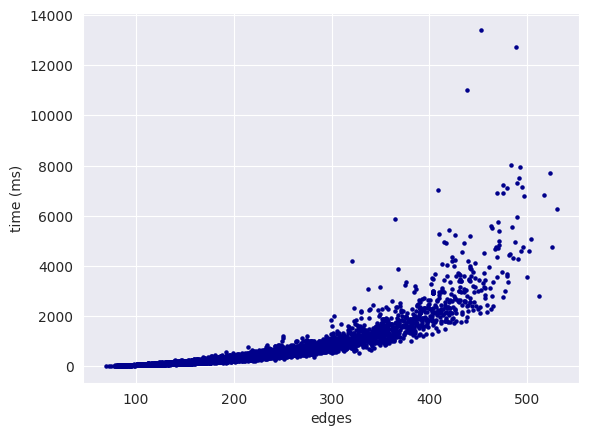

In [88]:
df.plot.scatter(x='edges', y='avg_time', c='DarkBlue', s=5, ylabel='time (ms)', xlabel='edges')

<Axes: xlabel='uncommon nodes', ylabel='time (ms)'>

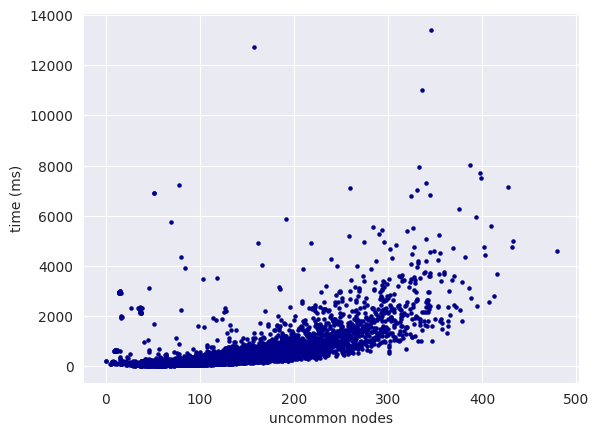

In [89]:
df.plot.scatter(x='uncommon_nodes', y='avg_time', c='DarkBlue', s=5, ylabel='time (ms)', xlabel='uncommon nodes')

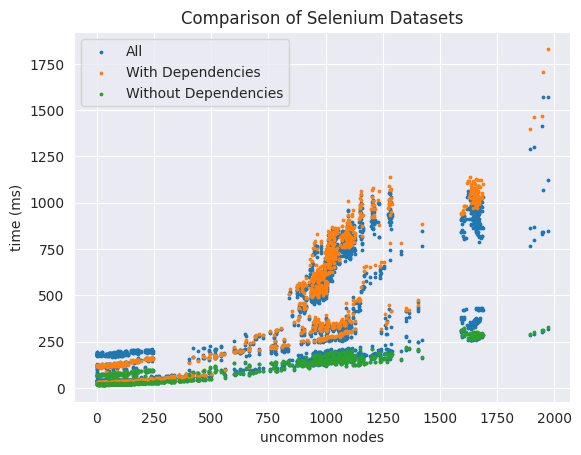

In [43]:
# Create a scatter plot for all metrics
plt.scatter(df['uncommon_nodes'], df['avg_time'], label='All', s=3)
plt.scatter(df_with['uncommon_nodes'], df_with['avg_time'], label='With Dependencies', s=3)
plt.scatter(df_without['uncommon_nodes'], df_without['avg_time'], label='Without Dependencies', s=3)

# Customize the plot
plt.xlabel('uncommon nodes')
plt.ylabel('time (ms)')
plt.title('Comparison of Selenium Datasets')
plt.legend()

# Display the plot
plt.show()

<Axes: xlabel='common nodes', ylabel='time (ms)'>

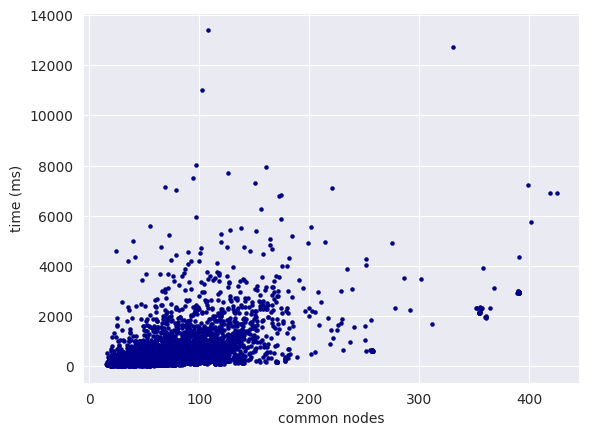

In [91]:
df.plot.scatter(x='generalization_nodes', y='avg_time', c='DarkBlue', s=5, ylabel='time (ms)', xlabel='common nodes')

<Axes: xlabel='common edges', ylabel='time (ms)'>

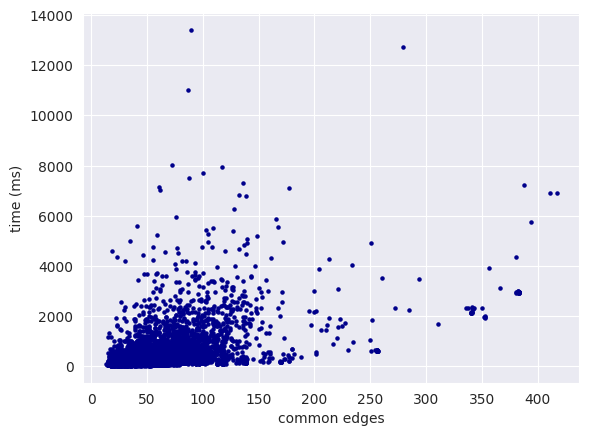

In [92]:
df.plot.scatter(x='generalization_edges', y='avg_time', c='DarkBlue', s=5, ylabel='time (ms)', xlabel='common edges')

<Axes: xlabel='uncommon edges', ylabel='time (ms)'>

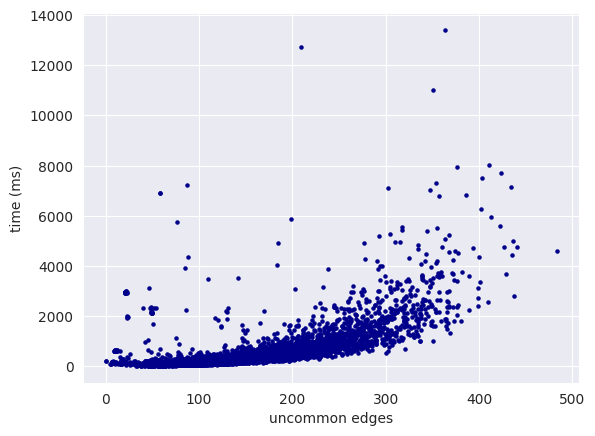

In [93]:
df.plot.scatter(x='uncommon_edges', y='avg_time', c='DarkBlue', s=5, ylabel='time (ms)', xlabel='uncommon edges')

<Axes: xlabel='log(uncommon edges)', ylabel='log(time (ms))'>

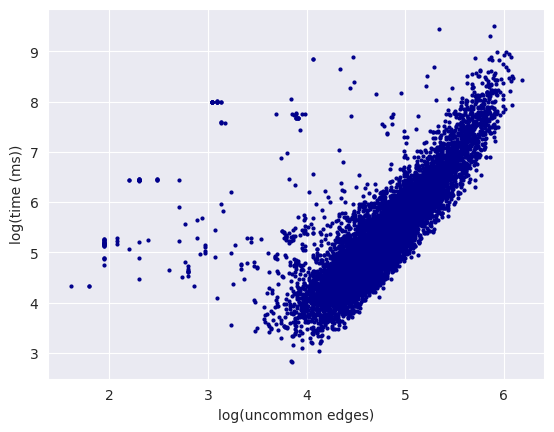

In [94]:
df.plot.scatter(x='log_uncommon_edges', y='log_avg_time', c='DarkBlue', s=4, ylabel='log(time (ms))', xlabel='log(uncommon edges)')

<Axes: xlabel='log(uncommon nodes)', ylabel='log(time (ms))'>

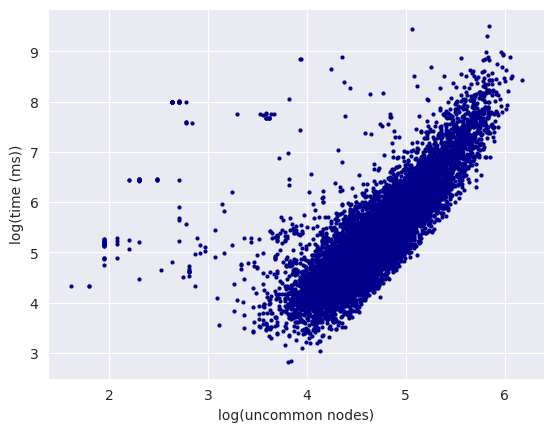

In [96]:
df.plot.scatter(x='log_uncommon_nodes', y='log_avg_time', c='DarkBlue', s=4, ylabel='log(time (ms))', xlabel='log(uncommon nodes)')

<Axes: xlabel='log(nodes)', ylabel='log(time (ms))'>

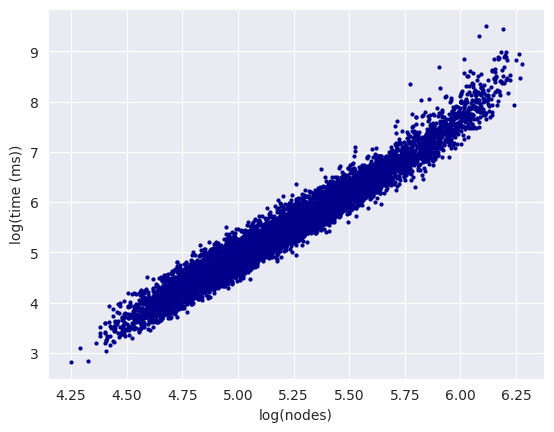

In [97]:
df.plot.scatter(x='log_nodes', y='log_avg_time', c='DarkBlue', s=4, ylabel='log(time (ms))', xlabel='log(nodes)')

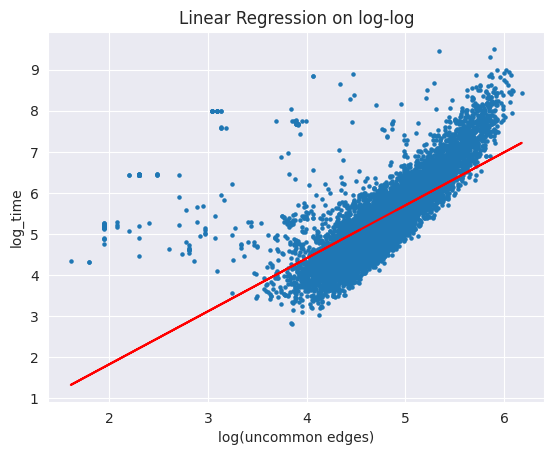

(array([[1.28878284]]), array([-0.74638624]), 0.46650436792149463)

In [98]:
linear_regression_of(df[df['uncommon_nodes'] != 0], 'log_uncommon_edges', 'log_avg_time', x_label='log(uncommon edges)', y_label='log_time', title='Linear Regression on log-log')

<Axes: xlabel='nodes * edges', ylabel='time (ms)'>

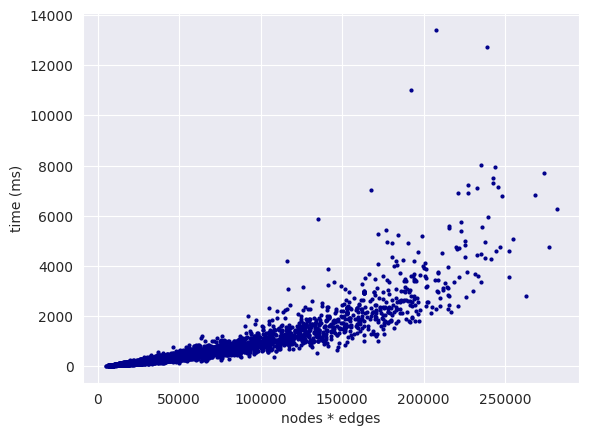

In [99]:
df.plot.scatter(x='nodes_X_edges', y='avg_time', c='DarkBlue', s=4, ylabel='time (ms)', xlabel='nodes * edges')

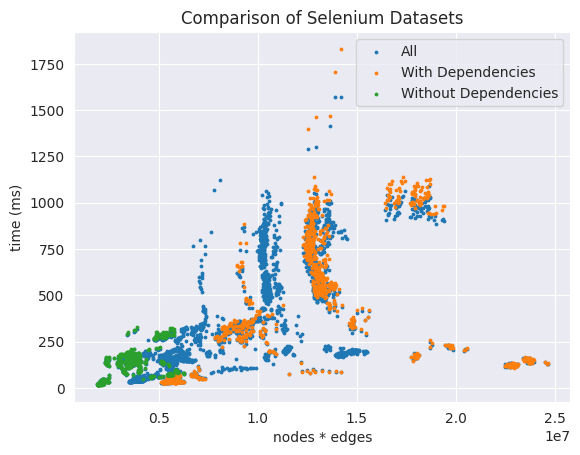

In [55]:
# Create a scatter plot for all metrics
plt.scatter(df['nodes_X_edges'], df['avg_time'], label='All', s=3)
plt.scatter(df_with['nodes_X_edges'], df_with['avg_time'], label='With Dependencies', s=3)
plt.scatter(df_without['nodes_X_edges'], df_without['avg_time'], label='Without Dependencies', s=3)

# Customize the plot
plt.xlabel('nodes * edges')
plt.ylabel('time (ms)')
plt.title('Comparison of Selenium Datasets')
plt.legend()

# Display the plot
plt.show()

<Axes: xlabel='uncommon nodes * uncommon edges', ylabel='time (ms)'>

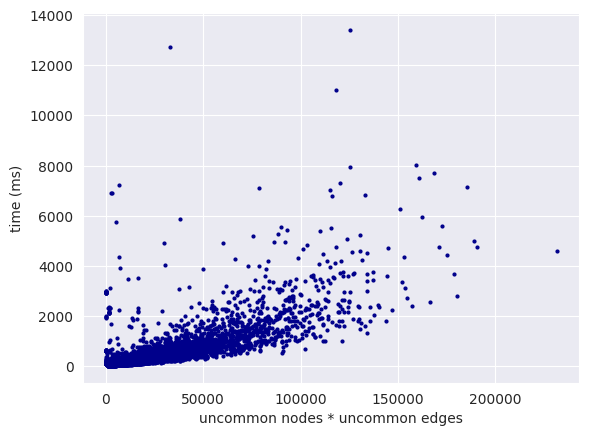

In [100]:
df.plot.scatter(x='uncommon_nodes_X_uncommon_edges', y='avg_time', c='DarkBlue', s=4, ylabel='time (ms)', xlabel='uncommon nodes * uncommon edges')

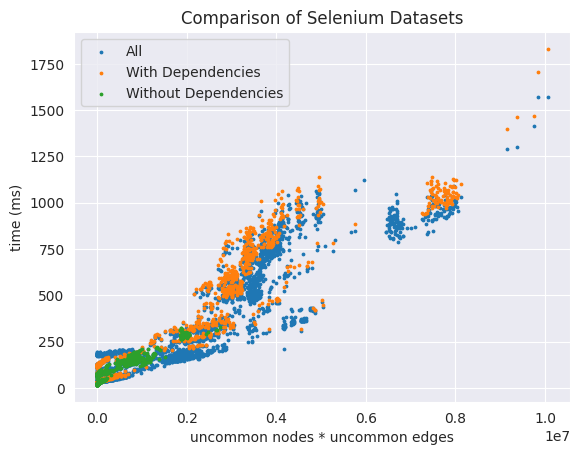

In [57]:
# Create a scatter plot for all metrics
plt.scatter(df['uncommon_nodes_X_uncommon_edges'], df['avg_time'], label='All', s=3)
plt.scatter(df_with['uncommon_nodes_X_uncommon_edges'], df_with['avg_time'], label='With Dependencies', s=3)
plt.scatter(df_without['uncommon_nodes_X_uncommon_edges'], df_without['avg_time'], label='Without Dependencies', s=3)

# Customize the plot
plt.xlabel('uncommon nodes * uncommon edges')
plt.ylabel('time (ms)')
plt.title('Comparison of Selenium Datasets')
plt.legend()

# Display the plot
plt.show()

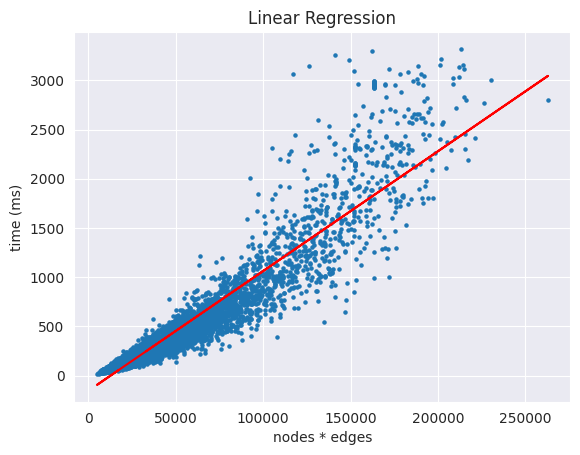

(array([[0.01217279]]), array([-154.56353153]), 0.8863734349331467)

In [101]:
quantile = df['avg_time'].quantile(0.99)
plt_df = df[df['avg_time'] < quantile]
linear_regression_of(plt_df, 'nodes_X_edges', 'avg_time', x_label='nodes * edges', y_label='time (ms)', title='Linear Regression')

/tmp/ipykernel_86472/2412008254.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plt_df['nodes_X_edges_bins'] = pd.cut(plt_df['nodes_X_edges'], bins=bins, include_lowest=True)


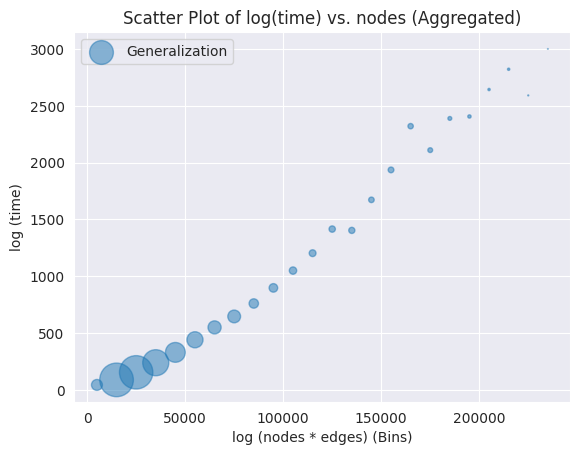

In [102]:
quantile = df['avg_time'].quantile(0.99)
plt_df = df[df['avg_time'] < quantile]

# Define the bin edges for 'MetricA' range
# 0.0 - 1_000_000
bins = [10_000 * i for i in range(25)]

# Create a new column 'MetricA_bin' by binning 'MetricA' values
plt_df['nodes_X_edges_bins'] = pd.cut(plt_df['nodes_X_edges'], bins=bins, include_lowest=True)

# Group the data by 'MetricA_bin' and calculate the mean of 'MetricB'
grouped_1_data = plt_df.groupby('nodes_X_edges_bins')['avg_time'].mean().reset_index()
grouped_1_data['nodes_X_edges_bins_numeric'] = grouped_1_data['nodes_X_edges_bins'].apply(lambda x: x.mid)
grouped_1_data['weights'] = plt_df.groupby('nodes_X_edges_bins')['avg_time'].count().reset_index()['avg_time'] / 4
#
# grouped_2_data = plt_df.groupby('nodes_bin')['avg_time_y'].mean().reset_index()
# grouped_2_data['nodes_bin_numeric'] = grouped_2_data['nodes_bin'].apply(lambda x: x.mid)
# grouped_2_data['weights'] = plt_df.groupby('nodes_bin')['avg_time_y'].count().reset_index()['avg_time_y'] / 4
#
# grouped_3_data = plt_df.groupby('nodes_bin')['avg_time_x'].mean().reset_index()
# grouped_3_data['nodes_bin_numeric'] = grouped_3_data['nodes_bin'].apply(lambda x: x.mid)
# grouped_3_data['weights'] = plt_df.groupby('nodes_bin')['avg_time_x'].count().reset_index()['avg_time_x'] / 4

# Create a scatter plot
plt.scatter(grouped_1_data['nodes_X_edges_bins_numeric'], grouped_1_data['avg_time'], label='Generalization', s=grouped_1_data['weights'], alpha=0.5)
# plt.scatter(grouped_2_data['nodes_bin_numeric'], grouped_2_data['avg_time_y'], label='Optimized Generalization', s=grouped_2_data['weights'], alpha=0.5)
# plt.scatter(grouped_3_data['nodes_bin_numeric'], grouped_3_data['avg_time_x'], label='Old Generalization', s=grouped_3_data['weights'], alpha=0.5)

# Customize the plot
plt.xlabel('log (nodes * edges) (Bins)')
plt.ylabel('log (time)')
plt.title('Scatter Plot of log(time) vs. nodes (Aggregated)')
plt.legend()

# Display the
plt.show()

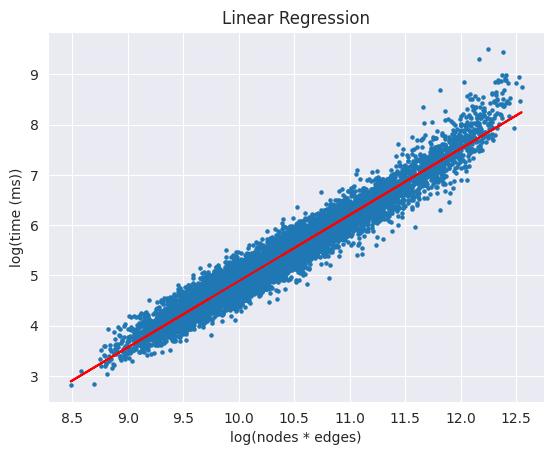

(array([[1.31785674]]), array([-8.29296055]), 0.9464821506178782)

In [103]:
linear_regression_of(df, 'log_nodes_X_edges', 'log_avg_time', x_label='log(nodes * edges)', y_label='log(time (ms))', title='Linear Regression')

/tmp/ipykernel_86472/3309794473.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plt_df['log_nodes_X_edges_bins'] = pd.cut(plt_df['log_nodes_X_edges'], bins=bins, include_lowest=True)


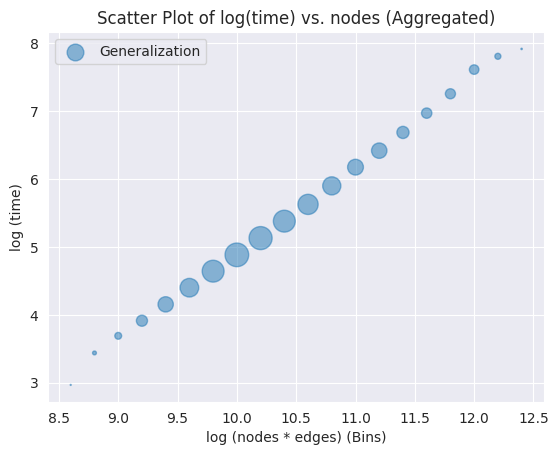

In [105]:
quantile = df['avg_time'].quantile(0.99)
plt_df = df[df['avg_time'] < quantile]

# Define the bin edges for 'MetricA' range
# 8.5 - 12.5
bins = [8.5 + 0.20 * i for i in range(40)]

# Create a new column 'MetricA_bin' by binning 'MetricA' values
plt_df['log_nodes_X_edges_bins'] = pd.cut(plt_df['log_nodes_X_edges'], bins=bins, include_lowest=True)

# Group the data by 'MetricA_bin' and calculate the mean of 'MetricB'
grouped_1_data = plt_df.groupby('log_nodes_X_edges_bins')['log_avg_time'].mean().reset_index()
grouped_1_data['log_nodes_X_edges_bins_numeric'] = grouped_1_data['log_nodes_X_edges_bins'].apply(lambda x: x.mid)
grouped_1_data['weights'] = plt_df.groupby('log_nodes_X_edges_bins')['log_avg_time'].count().reset_index()['log_avg_time'] / 4
#
# grouped_2_data = plt_df.groupby('nodes_bin')['log_avg_time_y'].mean().reset_index()
# grouped_2_data['nodes_bin_numeric'] = grouped_2_data['nodes_bin'].apply(lambda x: x.mid)
# grouped_2_data['weights'] = plt_df.groupby('nodes_bin')['log_avg_time_y'].count().reset_index()['log_avg_time_y'] / 4
#
# grouped_3_data = plt_df.groupby('nodes_bin')['log_avg_time_x'].mean().reset_index()
# grouped_3_data['nodes_bin_numeric'] = grouped_3_data['nodes_bin'].apply(lambda x: x.mid)
# grouped_3_data['weights'] = plt_df.groupby('nodes_bin')['log_avg_time_x'].count().reset_index()['log_avg_time_x'] / 4

# Create a scatter plot
plt.scatter(grouped_1_data['log_nodes_X_edges_bins_numeric'], grouped_1_data['log_avg_time'], label='Generalization', s=grouped_1_data['weights'], alpha=0.5)
# plt.scatter(grouped_2_data['nodes_bin_numeric'], grouped_2_data['log_avg_time_y'], label='Optimized Generalization', s=grouped_2_data['weights'], alpha=0.5)
# plt.scatter(grouped_3_data['nodes_bin_numeric'], grouped_3_data['log_avg_time_x'], label='Old Generalization', s=grouped_3_data['weights'], alpha=0.5)

# Customize the plot
plt.xlabel('log (nodes * edges) (Bins)')
plt.ylabel('log (time)')
plt.title('Scatter Plot of log(time) vs. nodes (Aggregated)')
plt.legend()

# Display the
plt.show()

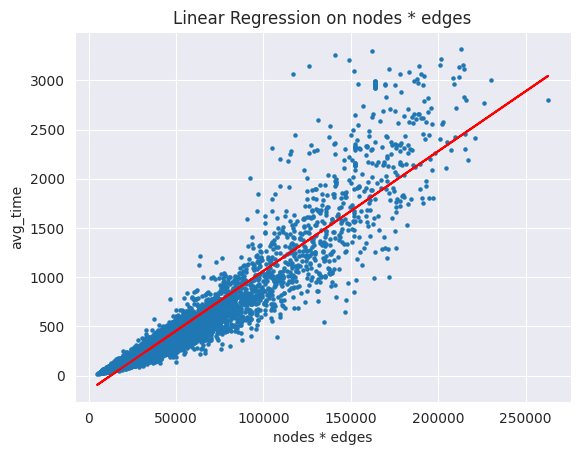

(array([[0.01217279]]), array([-154.56353153]), 0.8863734349331467)

In [107]:
linear_regression_of(plt_df, 'nodes_X_edges', 'avg_time', x_label='nodes * edges', y_label='avg_time', title='Linear Regression on nodes * edges')